In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import ast

# 1 Charging Set

In [84]:
charging_set = pd.read_csv("data/charging_sessions.csv")

## 1.1 Overview of Raw Data

In [85]:
print("columns:")
print(charging_set.columns)
print("-------------------------------------------------------------------------")
print("info():")
print(charging_set.info())
print("-------------------------------------------------------------------------")
print("describe():")
print(charging_set.describe())

columns:
Index(['Unnamed: 0', 'id', 'connectionTime', 'disconnectTime',
       'doneChargingTime', 'kWhDelivered', 'sessionID', 'siteID', 'spaceID',
       'stationID', 'timezone', 'userID', 'userInputs'],
      dtype='object')
-------------------------------------------------------------------------
info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone    

In [86]:
charging_set.head(10)

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."
5,5,5e23b149f9af8b5fe4b973d4,2020-01-02 14:00:13+00:00,2020-01-02 23:00:41+00:00,2020-01-02 20:13:21+00:00,13.370,1_1_194_821_2020-01-02 14:00:05.241573,1,AG-1F13,1-1-194-821,America/Los_Angeles,3519.0,"[{'WhPerMile': 600, 'kWhRequested': 24.0, 'mil..."
6,6,5e23b149f9af8b5fe4b973d5,2020-01-02 14:09:14+00:00,2020-01-03 01:57:58+00:00,2020-01-03 00:59:21+00:00,43.477,1_1_178_817_2020-01-02 14:09:14.451827,1,AG-1F09,1-1-178-817,America/Los_Angeles,933.0,"[{'WhPerMile': 385, 'kWhRequested': 65.45, 'mi..."
7,7,5e23b149f9af8b5fe4b973d6,2020-01-02 14:17:32+00:00,2020-01-03 00:44:54+00:00,2020-01-02 20:22:40+00:00,32.441,1_1_191_804_2020-01-02 14:17:32.329535,1,AG-4F34,1-1-191-804,America/Los_Angeles,3737.0,"[{'WhPerMile': 300, 'kWhRequested': 45.0, 'mil..."
8,8,5e23b149f9af8b5fe4b973d7,2020-01-02 14:25:38+00:00,2020-01-02 19:36:05+00:00,2020-01-02 18:38:39+00:00,13.264,1_1_194_826_2020-01-02 14:25:37.578692,1,AG-1F11,1-1-194-826,America/Los_Angeles,419.0,"[{'WhPerMile': 400, 'kWhRequested': 40.0, 'mil..."
9,9,5e23b149f9af8b5fe4b973d8,2020-01-02 14:27:40+00:00,2020-01-02 20:01:48+00:00,2020-01-02 19:17:46+00:00,13.285,1_1_178_823_2020-01-02 14:27:39.582337,1,AG-1F08,1-1-178-823,America/Los_Angeles,651.0,"[{'WhPerMile': 400, 'kWhRequested': 20.0, 'mil..."


## 1.2 Remove Unnecessary Columns

We remove the columns that have no additional value to our dataset, either because the column makes no sense (e.g. "Unnamed 0") or  because the data only holds one information that was already given by us (e.g. "timezone" only has "America/Los_Angeles").

In [87]:
charging_set.drop('Unnamed: 0', axis=1, inplace=True)
charging_set.drop('timezone', axis=1, inplace=True)

## 1.3 Splitting Multi-Info Columns

With the first look on the head of the dataset the column "userInputs" stands out since the data in that column is a dictionary. We split this column into separate columns first.

In [88]:
def parse_user_inputs(row):
    """
    This function parses one row of data that is a python object, like a dictionary in this case 
    
    param row : string representation of python object like a dictionary, or NaN.
    
    :return: first dictionary from the parsed list if valid, or an empty dictionary otherwise.
    """
    try:
        # Parse the row as a Python object (e.g., list of dicts)
        parsed = ast.literal_eval(row) if pd.notnull(row) else []
        return parsed[0] if isinstance(parsed, list) and len(parsed) > 0 else {}
    except (ValueError, SyntaxError):
        return {}

# Parse 'userInputs' column in charging_set
charging_set['userInputs'] = charging_set['userInputs'].apply(parse_user_inputs)

# Specify the desired features to extract
desired_features = [
    'WhPerMile', 'kWhRequested', 'milesRequested',
    'minutesAvailable', 'modifiedAt', 'paymentRequired',
    'requestedDeparture'
]

# Extract desired features and create new columns
for feature in desired_features:
    charging_set[feature] = charging_set['userInputs'].apply(
        lambda x: x.get(feature) if isinstance(x, dict) else None
    )
charging_set = charging_set.drop(columns=['userInputs'])
charging_set

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,userID,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture
0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,194.0,250.0,25.00,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT"
1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,4275.0,280.0,70.00,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT"
2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,344.0,400.0,8.00,20.0,60.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT"
3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,1117.0,400.0,8.00,20.0,65.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT"
4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,334.0,400.0,16.00,40.0,504.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,393.0,240.0,31.20,130.0,355.0,"Wed, 31 Jul 2019 18:08:23 GMT",True,"Thu, 01 Aug 2019 00:03:04 GMT"
66446,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,2019-07-31 21:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,220.0,333.0,6.66,20.0,455.0,"Wed, 31 Jul 2019 18:41:02 GMT",True,"Thu, 01 Aug 2019 02:15:41 GMT"
66447,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,1974.0,333.0,19.98,60.0,184.0,"Wed, 31 Jul 2019 19:04:57 GMT",True,"Wed, 31 Jul 2019 22:08:40 GMT"
66448,5d574ad2f9af8b4c10c03655,2019-07-31 19:19:47+00:00,2019-08-01 00:34:51+00:00,2019-07-31 21:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,942.0,275.0,22.00,80.0,60.0,"Wed, 31 Jul 2019 19:20:10 GMT",True,"Wed, 31 Jul 2019 20:19:47 GMT"


## 1.3 Duplicates

In [89]:
# check number of duplicates
n_duplicates = charging_set.duplicated().sum()
print("sum of duplicates:", n_duplicates)

# remove all duplicates
charging_set.drop_duplicates(inplace=True)
(charging_set.head(5))

sum of duplicates: 1413


,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,userID,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture
0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,194.0,250.0,25.0,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT"
1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,4275.0,280.0,70.0,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT"
2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,344.0,400.0,8.0,20.0,60.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT"
3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,1117.0,400.0,8.0,20.0,65.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT"
4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,334.0,400.0,16.0,40.0,504.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT"


## 1.4 Missing Data

In [90]:
# check number of none-values
nan_counts = charging_set.isna().sum()
nan_counts_sorted = nan_counts.sort_values(ascending=False)

for column, count in nan_counts_sorted.items():
    print(f"Feature: {column}, Count of NaN-Values: {count}")

Feature: requestedDeparture, Count of NaN-Values: 17215
Feature: milesRequested, Count of NaN-Values: 17215
Feature: paymentRequired, Count of NaN-Values: 17215
Feature: modifiedAt, Count of NaN-Values: 17215
Feature: minutesAvailable, Count of NaN-Values: 17215
Feature: WhPerMile, Count of NaN-Values: 17215
Feature: kWhRequested, Count of NaN-Values: 17215
Feature: userID, Count of NaN-Values: 17215
Feature: doneChargingTime, Count of NaN-Values: 4087
Feature: id, Count of NaN-Values: 0
Feature: stationID, Count of NaN-Values: 0
Feature: siteID, Count of NaN-Values: 0
Feature: spaceID, Count of NaN-Values: 0
Feature: kWhDelivered, Count of NaN-Values: 0
Feature: disconnectTime, Count of NaN-Values: 0
Feature: connectionTime, Count of NaN-Values: 0
Feature: sessionID, Count of NaN-Values: 0


We observe a large number of NaN-values in the columns that were separated from the column \"userInputs\". It is very noticeable that the number of NaN-values of the \"userInputs\"-columns is the same as the number of the NaN-values in the \"userID\"-column. Accordingly, we assume that the NaN-values in the \"userInputs\"-columns originate from users not being registered. In the following, we check if our assumption is correct:

In [91]:
# list of userInputs columns
user_inputs = ["requestedDeparture", "milesRequested", "paymentRequired", "modifiedAt", "minutesAvailable", "WhPerMile", "kWhRequested"]

def check_user_inputs_nan_condition(user_inputs_columns):
    """
    This function checks if userID is NaN for all NaN records in the userInputs columns.
    
    :param user_inputs_columns: list of user input columns that were stored in the former "userInputs"-column
    :return: True if no violations are found, False if a userID exists with NaN in the corresponding userInput column.
    """
    # iterate over each row and compare userID-value to userInputs-values
    for idx, row in charging_set.iterrows():
        user_id_value = row["userID"]

        for user_input_column in user_inputs_columns:
            user_input_value = row[user_input_column]

            # if userID is not NaN but the userInputs-column is NaN, return false
            if (pd.isna(user_input_value) and not pd.isna(user_id_value)) or (not pd.isna(user_input_value) and pd.isna(user_id_value)):
                return False

    # if no violation of condition is found, return true
    return True

# check if unregistered users are the reason for NaN-values in userInputs columns
print("Unregistered users are the reason for NaN-values in userInputs columns:", check_user_inputs_nan_condition(user_inputs))

Unregistered users are the reason for NaN-values in userInputs columns: True


Now that we have identified the reason for the NaN values in the userInputs columns as being unregistered users, it implies that these NaN values carry meaningful information. Therefore, we cannot simply remove the rows, as doing so would discard valuable data about the unregistered users. We replace the NaN-values with the number -1. For the time-data we choose a timestamp way out of our given time frame (2018-2021) as the value of the placeholder: 01.01.2025.
For the numerical data, we check if we can use the number as a placeholder first.

In [92]:
# non-time data columns
columns_contain_nan = ["userID", "milesRequested", "paymentRequired", "minutesAvailable", "WhPerMile", "kWhRequested"]
time_data_contain_nan = ["modifiedAt", "requestedDeparture"]

# check if relevant columns already contain -1
contains_zero_value = (charging_set[columns_contain_nan] == -1).any()
print("user-data column contains a -1 value:\n", contains_zero_value)

user-data column contains a -1 value:
 userID              False
milesRequested      False
paymentRequired     False
minutesAvailable    False
WhPerMile           False
kWhRequested        False
dtype: bool


In [93]:
# fill nan-placeholder in relevant columns
charging_set[columns_contain_nan] = charging_set[columns_contain_nan].fillna(-1)

# fill placholder in time data
placeholder_datetime_gmt = 'Wed, 01 Jan 2025 00:00:00 GMT'
charging_set[time_data_contain_nan] = charging_set[time_data_contain_nan].fillna(placeholder_datetime_gmt)

As we saw earlier, there are stil 4087 missing values in the column "doneChargingTime"

In [94]:
doneChargingTime_missing_values = charging_set["doneChargingTime"].isna().sum()
doneChargingTime_values = charging_set["doneChargingTime"].count()
print(
    f"Relative share of missing values in the column 'doneChargingTime': {(doneChargingTime_missing_values / doneChargingTime_values) * 100:.2f}%")

Relative share of missing values in the column 'doneChargingTime': 6.71%


The definition of the feature "doneChargingTime" provided in the Team Assignment document is that doneChargingTime is the last Time when "the last non-zero current draw recorded". This means that "doneChargingTime" is the timestamp at which the EV actively draws energy from the charging hub for the last time.

We see that in 6.71% of all records, "doneChargingTime" does not have a value. We interpret this as the EV not being charged to 100% state of charge in the respective charging session.

However, we want to check if "doneChargingTime" is always within the time period of "connectionTime" and "disconnectTime".

In [95]:
# Convert time-related columns to datetime format
charging_set['doneChargingTime'] = pd.to_datetime(charging_set['doneChargingTime'])
charging_set['connectionTime'] = pd.to_datetime(charging_set['connectionTime'])
charging_set['disconnectTime'] = pd.to_datetime(charging_set['disconnectTime'])

# Check condition: connectionTime < doneChargingTime < disconnectionTime
##### NOTE: NaT values are counted as condition fulfilled (we focus on the not NaT records here
condition_na_accepted = (
        charging_set["doneChargingTime"].isna() |
        ((charging_set['doneChargingTime'] > charging_set['connectionTime']) &
        (charging_set['doneChargingTime'] < charging_set['disconnectTime']))
)

condition_na_not_accepted = (
        charging_set["doneChargingTime"].notna() &
        ((charging_set['doneChargingTime'] > charging_set['connectionTime']) &
         (charging_set['doneChargingTime'] < charging_set['disconnectTime']))
)

# Calculate the percentage of cases where the condition is not satisfied
total_cases = len(charging_set)
unsatisfied_cases = (~condition_na_accepted).sum()
percentage_unsatisfied = (unsatisfied_cases / total_cases) * 100

# Calculate time differences in hours
charging_set['timeDiffParking'] = charging_set.apply(
    lambda row: (row['disconnectTime'] - row['doneChargingTime']).total_seconds() / 3600
    if not pd.isna(row['doneChargingTime']) else 0,
    axis=1
)

mean_time_diff_unsatisfied = charging_set.loc[~condition_na_accepted, 'timeDiffParking'].mean() if unsatisfied_cases > 0 else None

# mean time difference for rows where the condition is satisfied
mean_time_diff_satisfied = charging_set.loc[condition_na_accepted, 'timeDiffParking'].mean()

# Display results
print("Results:")
if condition_na_accepted.all():
    print("doneChargingTime is always earlier than disconnectTime and later than connectionTime.")
else:
    print("There are cases where doneChargingTime does not satisfy the condition.")
    print(f"Percentage of cases where the condition is not satisfied: {percentage_unsatisfied:.2f}%")

print(f"\nMean time difference (condition satisfied): {mean_time_diff_satisfied:.2f} min")
if mean_time_diff_unsatisfied is not None:
    print(f"Mean time difference (condition not satisfied): {mean_time_diff_unsatisfied:.2f} min")
else:
    print("No rows where the condition is not satisfied.")

# Create a dataframe with cases where the condition is not satisfied
charging_set_condition_unsatisfied = charging_set[~condition_na_accepted]

# Display the dataframe with unsatisfied cases
print("\nRows where the condition is not satisfied:")
charging_set_condition_unsatisfied

Results:
There are cases where doneChargingTime does not satisfy the condition.
Percentage of cases where the condition is not satisfied: 6.80%

Mean time difference (condition satisfied): 2.87 min
Mean time difference (condition not satisfied): 0.04 min

Rows where the condition is not satisfied:


,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,userID,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture,timeDiffParking
12,5e23b149f9af8b5fe4b973db,2020-01-02 15:04:38+00:00,2020-01-02 22:08:39+00:00,2020-01-02 22:09:36+00:00,25.567,1_1_178_824_2020-01-02 15:04:38.051735,1,AG-1F07,1-1-178-824,528.0,250.0,50.00,200.0,555.0,"Thu, 02 Jan 2020 15:04:49 GMT",True,"Fri, 03 Jan 2020 00:19:38 GMT",-0.015833
20,5e23b149f9af8b5fe4b973e3,2020-01-02 15:28:47+00:00,2020-01-02 19:01:54+00:00,2020-01-02 19:02:51+00:00,7.417,1_1_193_827_2020-01-02 15:28:46.685366,1,AG-1F02,1-1-193-827,1283.0,350.0,42.00,120.0,238.0,"Thu, 02 Jan 2020 15:29:16 GMT",True,"Thu, 02 Jan 2020 19:26:47 GMT",-0.015833
25,5e23b149f9af8b5fe4b973e8,2020-01-02 15:42:05+00:00,2020-01-02 21:58:45+00:00,2020-01-02 21:59:42+00:00,36.701,1_1_179_797_2020-01-02 15:42:05.217965,1,AG-3F23,1-1-179-797,474.0,400.0,32.00,80.0,532.0,"Thu, 02 Jan 2020 15:42:11 GMT",True,"Fri, 03 Jan 2020 00:34:05 GMT",-0.015833
26,5e23b149f9af8b5fe4b973e9,2020-01-02 15:57:24+00:00,2020-01-02 16:35:37+00:00,2020-01-02 16:36:34+00:00,3.689,1_1_179_781_2020-01-02 15:57:23.951170,1,AG-3F31,1-1-179-781,724.0,400.0,8.00,20.0,89.0,"Thu, 02 Jan 2020 15:57:39 GMT",True,"Thu, 02 Jan 2020 17:26:24 GMT",-0.015833
33,5e23b149f9af8b5fe4b973f0,2020-01-02 16:34:35+00:00,2020-01-02 18:49:41+00:00,2020-01-02 18:50:38+00:00,7.120,1_1_179_790_2020-01-02 16:34:34.999200,1,AG-3F19,1-1-179-790,2276.0,600.0,18.00,30.0,165.0,"Thu, 02 Jan 2020 16:35:06 GMT",True,"Thu, 02 Jan 2020 19:19:35 GMT",-0.015833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65028,5d2fbdd3f9af8b4d0dd0d546,2019-07-01 19:20:31+00:00,2019-07-02 00:16:32+00:00,2019-07-02 00:16:42+00:00,26.324,1_1_179_783_2019-07-01 19:20:30.955300,1,AG-3F29,1-1-179-783,458.0,400.0,8.00,20.0,204.0,"Mon, 01 Jul 2019 19:23:09 GMT",True,"Mon, 01 Jul 2019 22:44:31 GMT",-0.002778
65030,5d2fbdd3f9af8b4d0dd0d548,2019-07-01 20:01:07+00:00,2019-07-02 00:32:26+00:00,2019-07-02 00:32:59+00:00,21.588,1_1_179_800_2019-07-01 20:01:06.782562,1,AG-3F32,1-1-179-800,1479.0,275.0,19.25,70.0,286.0,"Mon, 01 Jul 2019 20:03:21 GMT",True,"Tue, 02 Jul 2019 00:47:07 GMT",-0.009167
65033,5d2fbdd3f9af8b4d0dd0d54b,2019-07-01 21:58:45+00:00,2019-07-02 00:39:48+00:00,2019-07-02 00:40:21+00:00,16.864,1_1_179_794_2019-07-01 21:58:44.571011,1,AG-3F20,1-1-179-794,364.0,400.0,40.00,100.0,234.0,"Mon, 01 Jul 2019 21:59:09 GMT",True,"Tue, 02 Jul 2019 01:52:45 GMT",-0.009167
65034,5d2fbdd3f9af8b4d0dd0d54c,2019-07-01 22:02:21+00:00,2019-07-02 00:58:50+00:00,2019-07-02 00:59:23+00:00,18.335,1_1_191_807_2019-07-01 22:02:20.810735,1,AG-4F47,1-1-191-807,2050.0,333.0,29.97,90.0,309.0,"Mon, 01 Jul 2019 22:02:37 GMT",True,"Tue, 02 Jul 2019 03:11:21 GMT",-0.009167


So now we see that the doneChargingTime is not always in the time frame between connectionTime and disconnectTime. This occurs in 7.25% of the time. However, since the mean difference between disconnectTime and doneChargingTime is roughly 2.5 minutes, we assume that this imprecision is due to technical issues during the data collection (e.g. delay in recording the last draw by the charging hub). Therefore, we set the values of "doneChargingTime" to be equal with "disconnectTime" for these records.  

In [96]:
# Update only rows where doneChargingTime is not NaT and the condition is not satisfied
charging_set.loc[~condition_na_not_accepted & charging_set['doneChargingTime'].notna(), 'doneChargingTime'] = \
    charging_set.loc[~condition_na_not_accepted & charging_set['doneChargingTime'].notna(), 'disconnectTime']

# Verify the update
charging_set[~condition_na_not_accepted][['doneChargingTime', 'disconnectTime']]


,doneChargingTime,disconnectTime
12,2020-01-02 22:08:39+00:00,2020-01-02 22:08:39+00:00
20,2020-01-02 19:01:54+00:00,2020-01-02 19:01:54+00:00
25,2020-01-02 21:58:45+00:00,2020-01-02 21:58:45+00:00
26,2020-01-02 16:35:37+00:00,2020-01-02 16:35:37+00:00
33,2020-01-02 18:49:41+00:00,2020-01-02 18:49:41+00:00
...,...,...
65028,2019-07-02 00:16:32+00:00,2019-07-02 00:16:32+00:00
65030,2019-07-02 00:32:26+00:00,2019-07-02 00:32:26+00:00
65033,2019-07-02 00:39:48+00:00,2019-07-02 00:39:48+00:00
65034,2019-07-02 00:58:50+00:00,2019-07-02 00:58:50+00:00


For the charging sessions where the car does not fully charge, we replace the NaN values with a placeholder just like we did for the userInputs. Here, we choose a time way out of our given time frame (2018-2021) as the value of the placeholder: 01.01.2025.

In [97]:
placeholder_datetime = pd.to_datetime('2025-01-01 00:00:00+00:00')
charging_set["doneChargingTime"] = charging_set["doneChargingTime"].fillna(placeholder_datetime)
charging_set[charging_set['doneChargingTime'] == placeholder_datetime]

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,userID,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture,timeDiffParking
3756,5ea3848df9af8b428bf97225,2020-04-08 16:36:53+00:00,2020-04-09 03:43:29+00:00,2025-01-01 00:00:00+00:00,25.183,1_1_194_822_2020-04-08 16:36:53.316264,1,AG-1F12,1-1-194-822,507.0,250.0,75.0,300.0,720.0,"Wed, 08 Apr 2020 16:37:01 GMT",True,"Thu, 09 Apr 2020 04:36:53 GMT",0.0
3757,5ea4d60df9af8b46573f1ee7,2020-04-09 13:23:52+00:00,2020-04-09 17:59:02+00:00,2025-01-01 00:00:00+00:00,14.136,1_1_193_827_2020-04-09 13:23:51.689520,1,AG-1F02,1-1-193-827,419.0,400.0,40.0,100.0,479.0,"Thu, 09 Apr 2020 13:24:06 GMT",True,"Thu, 09 Apr 2020 21:22:52 GMT",0.0
3758,5ea4d60df9af8b46573f1ee8,2020-04-09 13:40:03+00:00,2020-04-09 21:43:22+00:00,2025-01-01 00:00:00+00:00,14.203,1_1_178_823_2020-04-09 13:39:55.115497,1,AG-1F08,1-1-178-823,5065.0,400.0,24.0,60.0,483.0,"Thu, 09 Apr 2020 13:40:03 GMT",True,"Thu, 09 Apr 2020 21:43:03 GMT",0.0
3759,5ea4d60df9af8b46573f1ee9,2020-04-09 14:01:53+00:00,2020-04-09 16:33:40+00:00,2025-01-01 00:00:00+00:00,13.041,1_1_178_828_2020-04-09 14:01:53.467693,1,AG-1F10,1-1-178-828,651.0,400.0,20.0,50.0,183.0,"Thu, 09 Apr 2020 14:02:09 GMT",True,"Thu, 09 Apr 2020 17:04:53 GMT",0.0
3760,5ea4d60df9af8b46573f1eea,2020-04-09 15:01:06+00:00,2020-04-09 23:38:08+00:00,2025-01-01 00:00:00+00:00,5.797,1_1_193_820_2020-04-09 15:01:06.343454,1,AG-1F04,1-1-193-820,466.0,300.0,6.0,20.0,182.0,"Thu, 09 Apr 2020 15:01:20 GMT",True,"Thu, 09 Apr 2020 18:03:06 GMT",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60396,5cb3d2a8f9af8b4551261e66,2019-03-29 16:54:49+00:00,2019-03-29 21:55:22+00:00,2025-01-01 00:00:00+00:00,15.753,1_1_179_799_2019-03-29 16:54:49.239801,1,AG-3F25,1-1-179-799,1078.0,400.0,20.0,50.0,139.0,"Fri, 29 Mar 2019 16:55:03 GMT",True,"Fri, 29 Mar 2019 19:13:49 GMT",0.0
60411,5cb3d2a8f9af8b4551261e75,2019-03-30 00:32:10+00:00,2019-03-30 02:23:14+00:00,2025-01-01 00:00:00+00:00,11.148,1_1_193_829_2019-03-30 00:32:10.128651,1,AG-1F03,1-1-193-829,194.0,400.0,24.0,60.0,137.0,"Sat, 30 Mar 2019 00:32:57 GMT",True,"Sat, 30 Mar 2019 02:49:10 GMT",0.0
61097,5cc8e891f9af8b45d975b819,2019-04-14 16:19:12+00:00,2019-04-14 20:38:39+00:00,2025-01-01 00:00:00+00:00,11.678,1_1_193_816_2019-04-14 16:19:11.864262,1,AG-1F05,1-1-193-816,364.0,400.0,56.0,140.0,222.0,"Sun, 14 Apr 2019 16:19:34 GMT",True,"Sun, 14 Apr 2019 20:01:12 GMT",0.0
61103,5cca3a54f9af8b49aaa4cbac,2019-04-15 13:00:59+00:00,2019-04-15 13:55:25+00:00,2025-01-01 00:00:00+00:00,3.343,1_1_193_819_2019-04-15 13:00:58.722284,1,AG-1F06,1-1-193-819,651.0,400.0,20.0,50.0,158.0,"Mon, 15 Apr 2019 13:01:13 GMT",True,"Mon, 15 Apr 2019 15:38:59 GMT",0.0


Now that we have removed the inaccurate and NaN/NaT entries from the "doneChargingTime" feature, we need to update the calculations of "diffTimParking", since we calculated this feature based on the original records.

In [98]:
charging_set['timeDiffParking'] = charging_set.apply(
    lambda row: (row['disconnectTime'] - row['doneChargingTime']).total_seconds() / 3600
    if row['doneChargingTime'] != placeholder_datetime else 0,
    axis=1
)

## 1.6 Feature Enigneering

### 1.5.1 Time Features

The time data is recorded in UTC format, which is not easily readable for humans. Therefore, we break it down into more human-readable components, such as year, month, day and time.

In [99]:
# convert remaining time data features
# connectionTime, disconnectTime and doneChargingTime have already been converted while handling missing data (chapter 1.4)
charging_set['modifiedAt'] = pd.to_datetime(charging_set['modifiedAt'])
charging_set['requestedDeparture'] = pd.to_datetime(charging_set['requestedDeparture'])

charging_set['connectionTime_year'] = charging_set['connectionTime'].dt.year
charging_set['connectionTime_month'] = charging_set['connectionTime'].dt.month
charging_set['connectionTime_day'] = charging_set['connectionTime'].dt.day
charging_set['connectionTime_time'] = charging_set['connectionTime'].dt.time
charging_set['connectionTime_weekday'] = charging_set['connectionTime'].dt.weekday

charging_set['disconnectTime_year'] = charging_set['disconnectTime'].dt.year
charging_set['disconnectTime_month'] = charging_set['disconnectTime'].dt.month
charging_set['disconnectTime_day'] = charging_set['disconnectTime'].dt.day
charging_set['disconnectTime_time'] = charging_set['disconnectTime'].dt.time
charging_set['disconnectTime_weekday'] = charging_set['disconnectTime'].dt.weekday

charging_set['doneChargingTime_year'] = charging_set['doneChargingTime'].dt.year
charging_set['doneChargingTime_month'] = charging_set['doneChargingTime'].dt.month
charging_set['doneChargingTime_day'] = charging_set['doneChargingTime'].dt.day
charging_set['doneChargingTime_time'] = charging_set['doneChargingTime'].dt.time
charging_set['doneChargingTime_weekday'] = charging_set['doneChargingTime'].dt.weekday

charging_set['modifiedAt_year'] = charging_set['modifiedAt'].dt.year
charging_set['modifiedAt_month'] = charging_set['modifiedAt'].dt.month
charging_set['modifiedAt_day'] = charging_set['modifiedAt'].dt.day
charging_set['modifiedAt_time'] = charging_set['modifiedAt'].dt.time
charging_set['modifiedAt_weekday'] = charging_set['modifiedAt'].dt.weekday

charging_set['requestedDeparture_year'] = charging_set['requestedDeparture'].dt.year
charging_set['requestedDeparture_month'] = charging_set['requestedDeparture'].dt.month
charging_set['requestedDeparture_day'] = charging_set['requestedDeparture'].dt.day
charging_set['requestedDeparture_time'] = charging_set['requestedDeparture'].dt.time
charging_set['requestedDeparture_weekday'] = charging_set['requestedDeparture'].dt.weekday

To better analyse the objectives later on we isolate valuable information into own features such as:
- connectionDuration: the time a vehicle is connected to the charging hub (in hours)
- chargingDuration: the time a vehicle is actively drawing energy from the charging hub (in hours)  

In [100]:
charging_set["connectionDuration"] = (charging_set["disconnectTime"] - charging_set["connectionTime"]).dt.total_seconds()/3600

charging_set["chargingDuration"] = charging_set.apply(
    lambda row: row["connectionDuration"] if row["doneChargingTime"] == placeholder_datetime
    else (row["doneChargingTime"] - row["connectionTime"]).total_seconds()/3600,
    axis=1
)

### 1.5.2 Non-Time Features

Since the exact ID assigned to a registered user is not of primary interest, but rather the higher-level information about whether a user is registered or not, we introduce the binary feature 'isRegistered' to indicate the user's registration status in the dataset.

This also applies to the feature "doneChargingTime". The main focus is not on the exact time of day when the car reaches 100% charge (i.e., doneChargingTime), but rather on whether the car has charged fully and, if it has, how long the car remained connected to the charging hub without further charging (i.e., how long it stayed plugged in after reaching 100%).

In [101]:
# isRegistered should be 0 if a user is not registered (userID == NaN) and be 1 if a user is registered
charging_set['isRegistered'] = (charging_set['userID'] != -1).astype(int)

# fullyCharged
charging_set['fullyCharged'] = (charging_set['doneChargingTime'] != placeholder_datetime).astype(int)

# parkingTime
charging_set['parkingDuration'] = charging_set.apply(
    lambda row: (row['disconnectTime'] - row['doneChargingTime']).total_seconds() / 3600
    if row['fullyCharged'] == 1 else 0, axis=1
)

# Optional: Round parkingTime to 2 decimal places for readability
charging_set['parkingDuration'] = charging_set['parkingDuration'].round(2)

# Display the result
charging_set[['doneChargingTime', 'disconnectTime', 'fullyCharged', 'parkingDuration']]

,doneChargingTime,disconnectTime,fullyCharged,parkingDuration
0,2020-01-02 17:31:35+00:00,2020-01-02 19:11:15+00:00,1,1.66
1,2020-01-02 20:18:05+00:00,2020-01-02 22:38:21+00:00,1,2.34
2,2020-01-02 16:35:06+00:00,2020-01-03 00:39:22+00:00,1,8.07
3,2020-01-02 15:18:45+00:00,2020-01-02 16:38:39+00:00,1,1.33
4,2020-01-02 18:17:30+00:00,2020-01-02 22:08:40+00:00,1,3.85
...,...,...,...,...
65032,2019-07-01 23:14:33+00:00,2019-07-02 01:37:18+00:00,1,2.38
65033,2019-07-02 00:39:48+00:00,2019-07-02 00:39:48+00:00,1,0.00
65034,2019-07-02 00:58:50+00:00,2019-07-02 00:58:50+00:00,1,0.00
65035,2019-07-02 02:03:36+00:00,2019-07-02 02:03:36+00:00,1,0.00


## 1.7 Outliers

To identify outliers we print out all ranges for numerical data and print out the sorted unique values for categorical data. This way, we also check for wrong data inputs (e.g. wrong character in string) since these are sorted to be either in the beginning or the end of the sorted unique list.

In [102]:
# check ranges of numeric columns
numeric_columns = charging_set.select_dtypes(include=[np.number])
for col in numeric_columns.columns:
    # exclude placeholders (-1, 2025 for the years)
    if col.endswith('_year'):
        valid_values = numeric_columns.loc[(numeric_columns[col] != -1) & (numeric_columns[col] != 2025), col]
    else:
        valid_values = numeric_columns.loc[numeric_columns[col] != -1, col]
    print(f"Column '{col}': min={valid_values.min()}, max={valid_values.max()}")
    
# check categorical columns (non-numeric)
categorical_columns = charging_set.select_dtypes(exclude=[np.number])
for col in categorical_columns.columns:
    unique_values = categorical_columns[col].unique()
    sorted_unique_values = sorted(unique_values)
    if sorted_unique_values:
        print(f"Column '{col}': first={sorted_unique_values[0]}, last={sorted_unique_values[-1]}")
    else:
        print(f"Column '{col}': no unique values")

Column 'kWhDelivered': min=0.501, max=108.79724166666666
Column 'siteID': min=1, max=2
Column 'userID': min=1.0, max=19923.0
Column 'WhPerMile': min=50.0, max=2000.0
Column 'kWhRequested': min=0.0, max=215.32
Column 'milesRequested': min=0.0, max=775.0
Column 'minutesAvailable': min=1.0, max=10062.0
Column 'timeDiffParking': min=0.0, max=156.1213888888889
Column 'connectionTime_year': min=2018, max=2021
Column 'connectionTime_month': min=1, max=12
Column 'connectionTime_day': min=1, max=31
Column 'connectionTime_weekday': min=0, max=6
Column 'disconnectTime_year': min=2018, max=2021
Column 'disconnectTime_month': min=1, max=12
Column 'disconnectTime_day': min=1, max=31
Column 'disconnectTime_weekday': min=0, max=6
Column 'doneChargingTime_year': min=2018, max=2021
Column 'doneChargingTime_month': min=1, max=12
Column 'doneChargingTime_day': min=1, max=31
Column 'doneChargingTime_weekday': min=0, max=6
Column 'modifiedAt_year': min=2018, max=2021
Column 'modifiedAt_month': min=1, max=12

We identify multiple columns with suspiciously high or low data ranges:
- kWhDelivered
- WhPerMile
- milesRequested
- minutesAvailable
- timeDiffParking
- connectionDuration
- chargingDuration
- parkingDuration

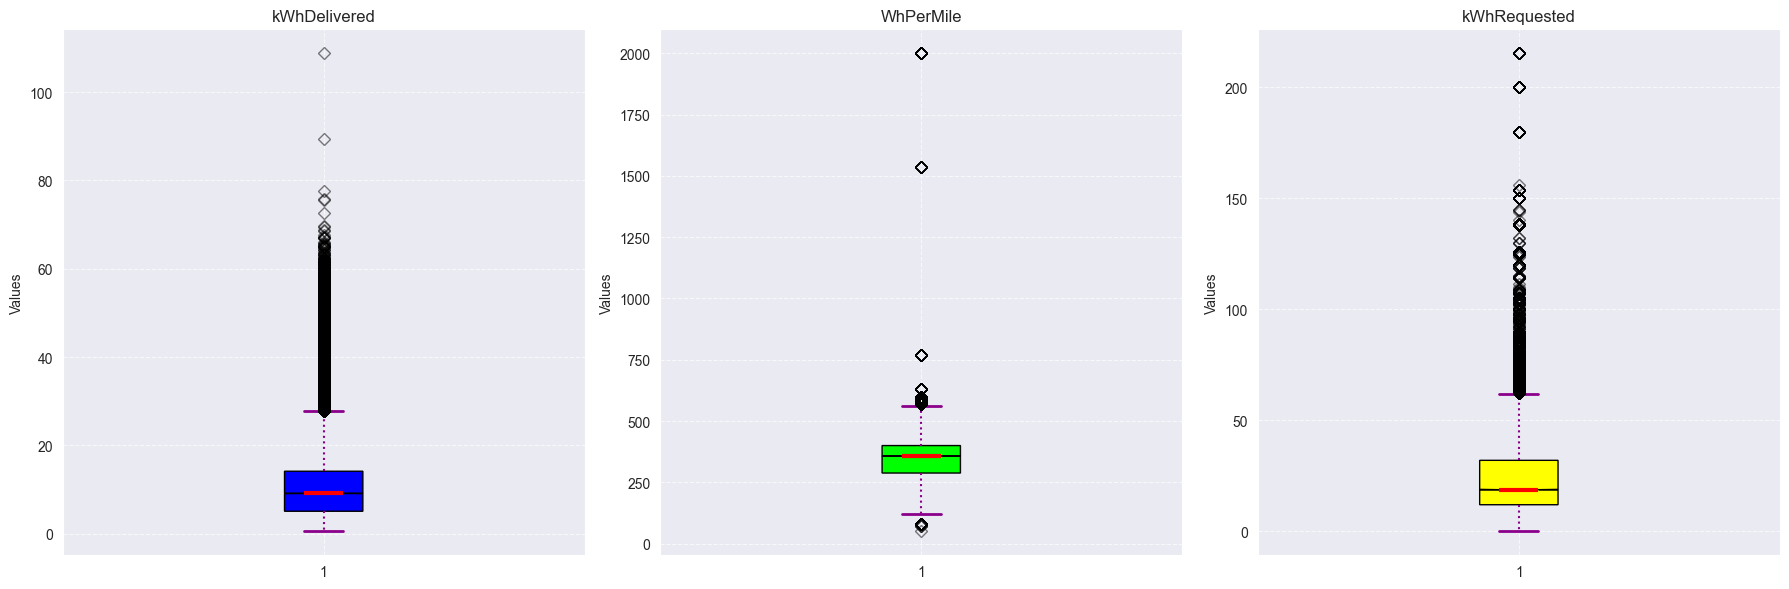

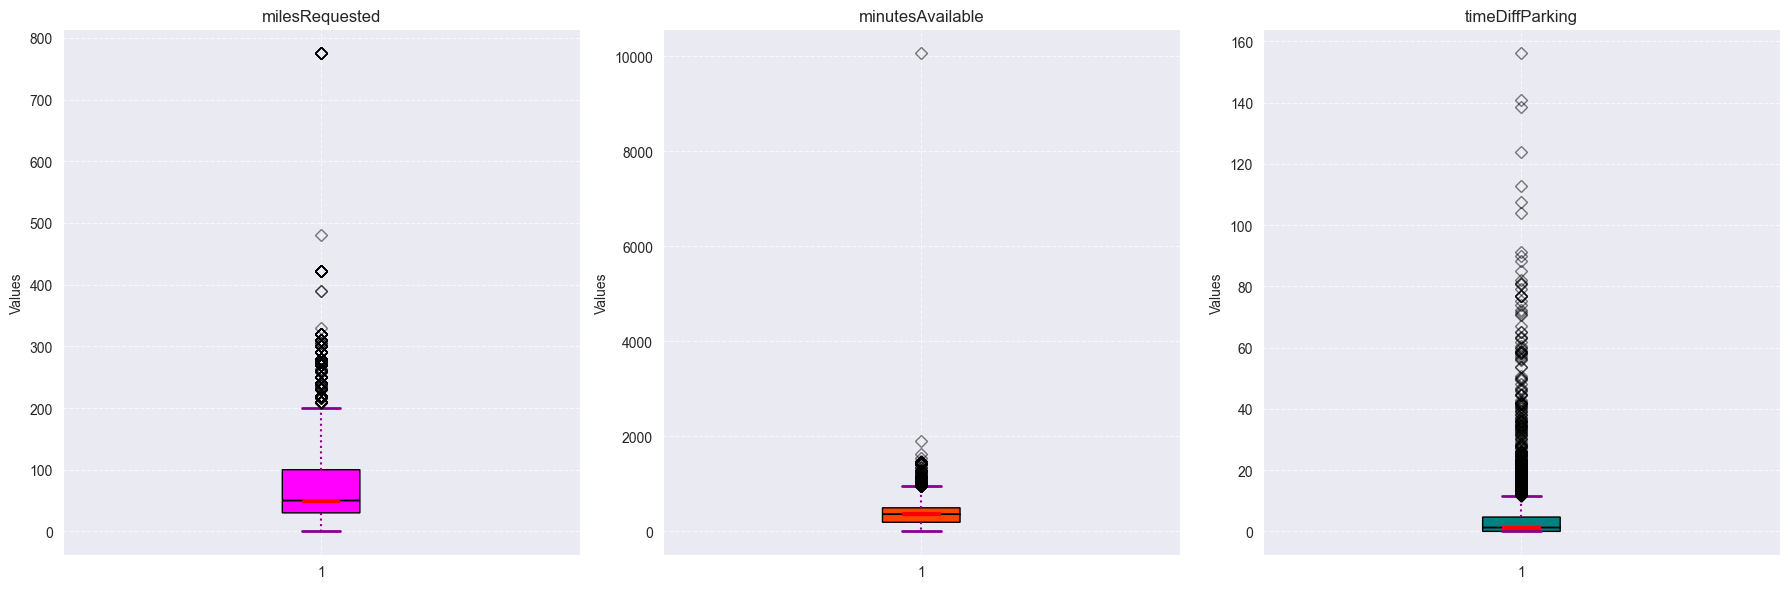

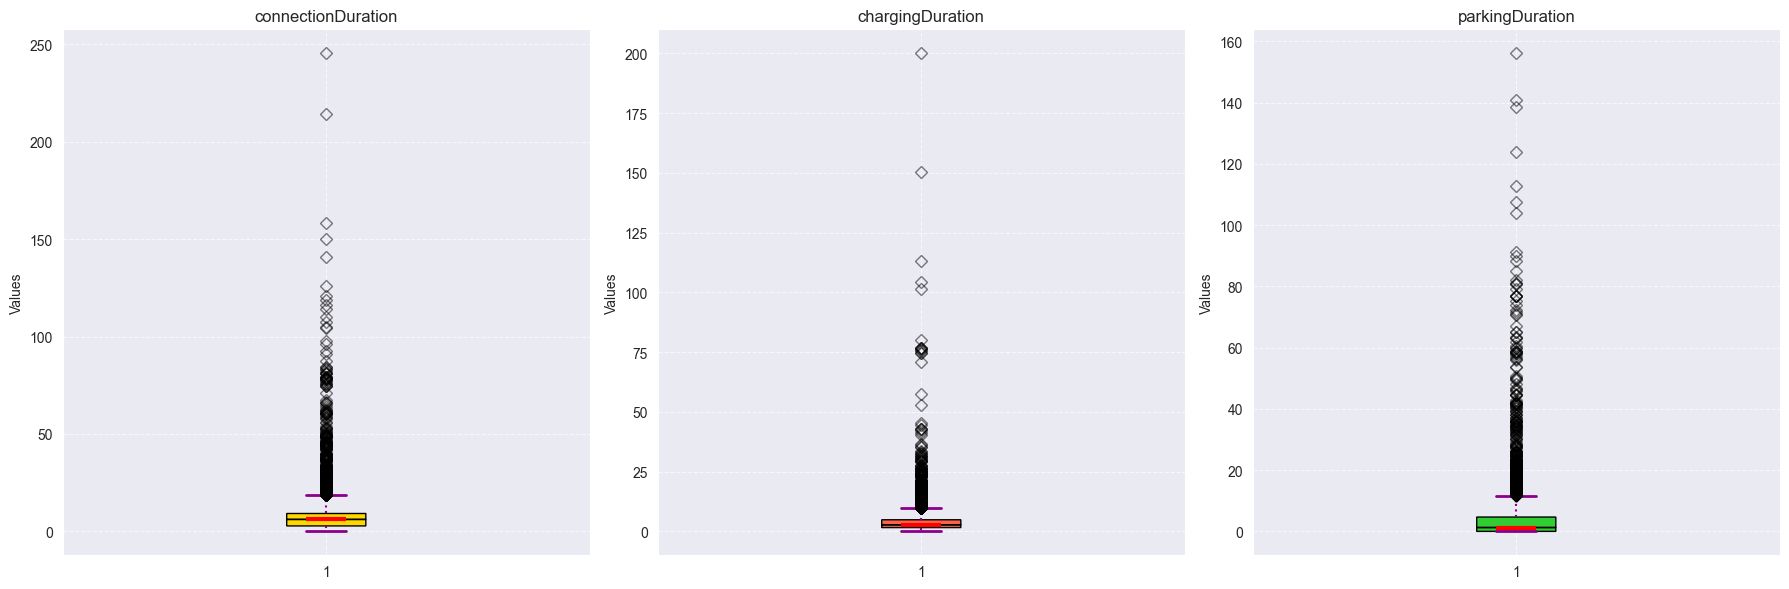

In [103]:
# visualize numerical data with boxplot to check for outliers
kWhDelivered_data = list(filter(lambda x: x != -1, charging_set["kWhDelivered"]))
WhPerMile_data = list(filter(lambda x: x != -1, charging_set["WhPerMile"]))
kWhRequested_data = list(filter(lambda x: x != -1, charging_set["kWhRequested"]))
milesRequested_data = list(filter(lambda x: x != -1, charging_set["milesRequested"]))
minutesAvailable_data = list(filter(lambda x: x != -1, charging_set["minutesAvailable"]))
timeDiffParking_data = list(filter(lambda x: x != -1, charging_set["timeDiffParking"]))
connectionDuration_data = list(filter(lambda x: x != -1, charging_set["connectionDuration"]))
chargingDuration_data = list(filter(lambda x: x != -1, charging_set["chargingDuration"]))
parkingDuration_data = list(filter(lambda x: x != -1, charging_set["parkingDuration"]))

focused_features = [kWhDelivered_data, WhPerMile_data, kWhRequested_data, milesRequested_data, minutesAvailable_data, timeDiffParking_data, connectionDuration_data, chargingDuration_data, parkingDuration_data]
focused_features_labels = ['kWhDelivered', 'WhPerMile', 'kWhRequested', 'milesRequested', 'minutesAvailable', 'timeDiffParking', 'connectionDuration', 'chargingDuration', 'parkingDuration']
colors = ['#0000FF', '#00FF00', '#FFFF00', '#FF00FF', '#FF4500', '#008080', '#FFD700', '#FF6347', '#32CD32']

# Create subplots with 3 boxplots displayed side by side
for i in range(0, len(focused_features), 3):  # Process three datasets at a time
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Create 3 subplots in one row

    # Iterate over the current triplet of datasets
    for j, (ax, data_list, label, color) in enumerate(zip(axes, focused_features[i:i+3], focused_features_labels[i:i+3], colors[i:i+3])):
        # Creating boxplot
        bp = ax.boxplot(data_list, patch_artist=True, notch=True, vert=True)

        # Customizing boxplot
        for patch in bp['boxes']:
            patch.set_facecolor(color)

        for whisker in bp['whiskers']:
            whisker.set(color='#8B008B', linewidth=1.5, linestyle=":")

        for cap in bp['caps']:
            cap.set(color='#8B008B', linewidth=2)

        for median in bp['medians']:
            median.set(color='red', linewidth=3)

        for flier in bp['fliers']:
            flier.set(marker='D', color='#e7298a', alpha=0.5)

        # Adding labels and title
        ax.set_title(f"{label}")
        ax.set_ylabel('Values')
        ax.grid(True, linestyle='--', alpha=0.7)

    # Hide the remaining subplots if there are less than 3 datasets left
    for j in range(len(focused_features[i:i+3]), 3):
        axes[j].axis('off')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


### Remove outliers
We can see that the focused features do not follow a normal distribution but show more similarities with that of an exponential function. Therefore, we cannot identify outliers using the z-scores. However, we set thresholds manually.

After further research, the average electric vehicle (EV) has an energy consumption of 304 Wh/mile (189 Wh/km). The minimum energy consumption is estimated at 220 Wh/mile and the maximum energy consumption is estimated at 749 Wh/mile. For the driving range, our research results in these specifications: the current average range is 283 miles per full charge, while the minimum range for a full charge is estimated at 149 miles and the maximum range for one full charge is at 520 miles.

There are multiple other factors that affect the performance of a car like the weather, vehicle design and driving conditions. The numbers from our research are often provided by the car manufacturers, which stem from tests under optimal conditions. We set the thresholds with margin for unexpected influence of other/unknown factors (driving conditions, personal driving style etc.).

Consequently, we set the minimum threshold for outliers for the feature "WhPerMile" to 200 Wh/mile and the maximum threshold to 750 Wh/mile.
The minimum threshold for the milesRequested is set to 0 miles (depends on state of charge of the car the the time it plugs into the charging hub) and the maximum threshold to 550 miles.

We will now remove the outliers for the features "WhPerMile" and "milesRequested" and then see how the other focused features behave.


In [105]:
# define thresholds
min_ts_WhPerMile = 200
max_ts_WhPerMile = 750

min_ts_milesRequested = 0
max_ts_milesRequested = 550

min_ts_minutesAvailable = 0
max_ts_minutesAvailable = 1500

# count number of records that we would remove from dataset
count_WhPerMile = (((charging_set['WhPerMile'] > max_ts_WhPerMile) | (charging_set['WhPerMile'] < min_ts_WhPerMile)) & (charging_set['WhPerMile'] >= 0)).sum()
print("numer of outliers in 'WhPerMile'", count_WhPerMile)
print(f"share of outliers in data set: {count_WhPerMile / len(charging_set)*100:.2f}%")

# milesRequested
count_milesRequested = (((charging_set['milesRequested'] > max_ts_milesRequested) | (charging_set['milesRequested'] < min_ts_milesRequested)) & (charging_set['milesRequested'] >= 0)).sum()
print("numer of outliers in 'milesRequested'", count_milesRequested)
print(f"share of outliers in data set: {count_milesRequested / len(charging_set)*100:.2f}%")

# minutesAvailable
count_minutesAvailable = (((charging_set['minutesAvailable'] > max_ts_minutesAvailable) | (charging_set['minutesAvailable'] < min_ts_minutesAvailable)) & (charging_set['minutesAvailable'] >= 0)).sum()
print("numer of outliers in 'minutesAvailable'", count_minutesAvailable)
print(f"share of outliers in data set: {count_minutesAvailable / len(charging_set)*100:.2f}%")

numer of outliers in 'WhPerMile' 73
share of outliers in data set: 0.11%
numer of outliers in 'milesRequested' 8
share of outliers in data set: 0.01%
numer of outliers in 'minutesAvailable' 4
share of outliers in data set: 0.01%


In [106]:
# remove outliers
charging_set = charging_set[(charging_set['WhPerMile'] < max_ts_WhPerMile) & (charging_set['WhPerMile'] > min_ts_WhPerMile)]
charging_set = charging_set[(charging_set['milesRequested'] < max_ts_milesRequested) & (charging_set['milesRequested'] > min_ts_milesRequested)]
charging_set = charging_set[(charging_set['minutesAvailable'] < max_ts_minutesAvailable) & (charging_set['minutesAvailable'] > min_ts_minutesAvailable)]

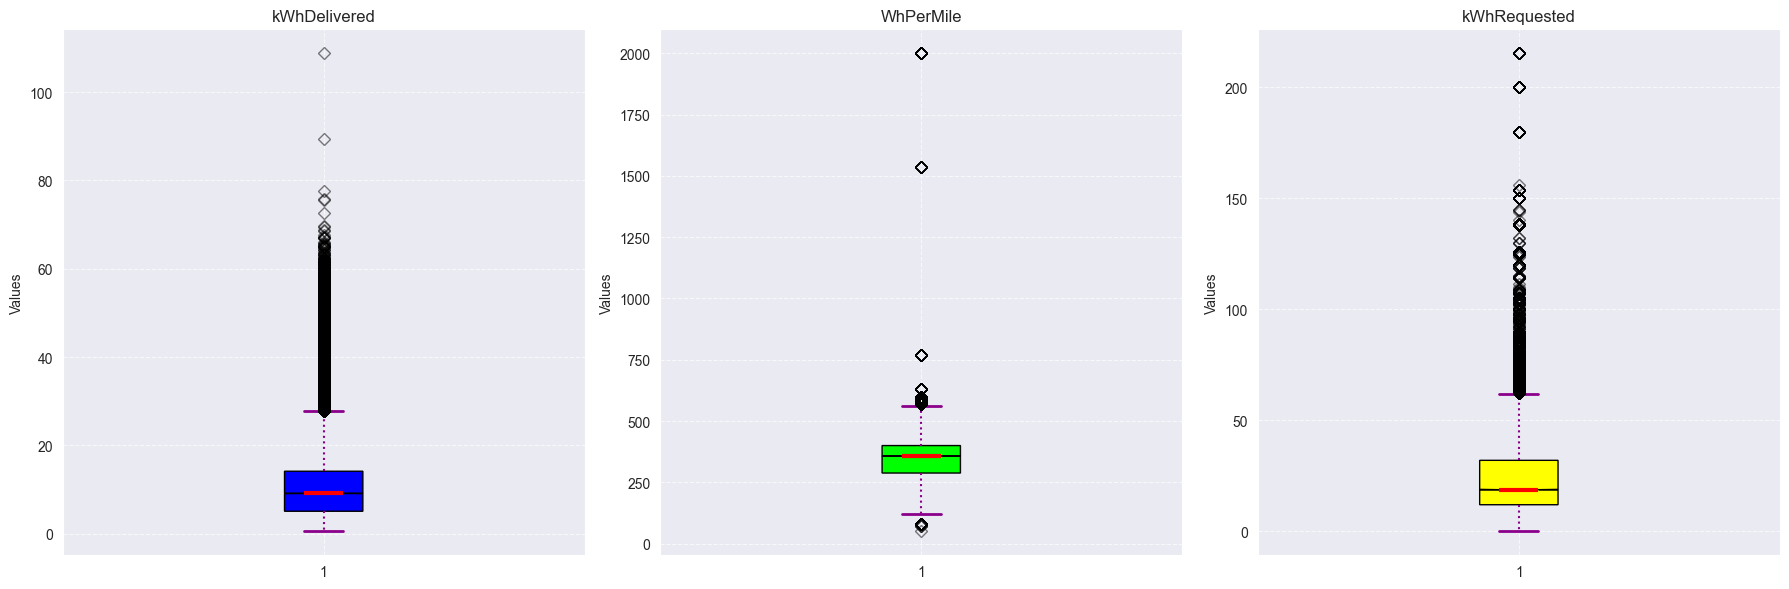

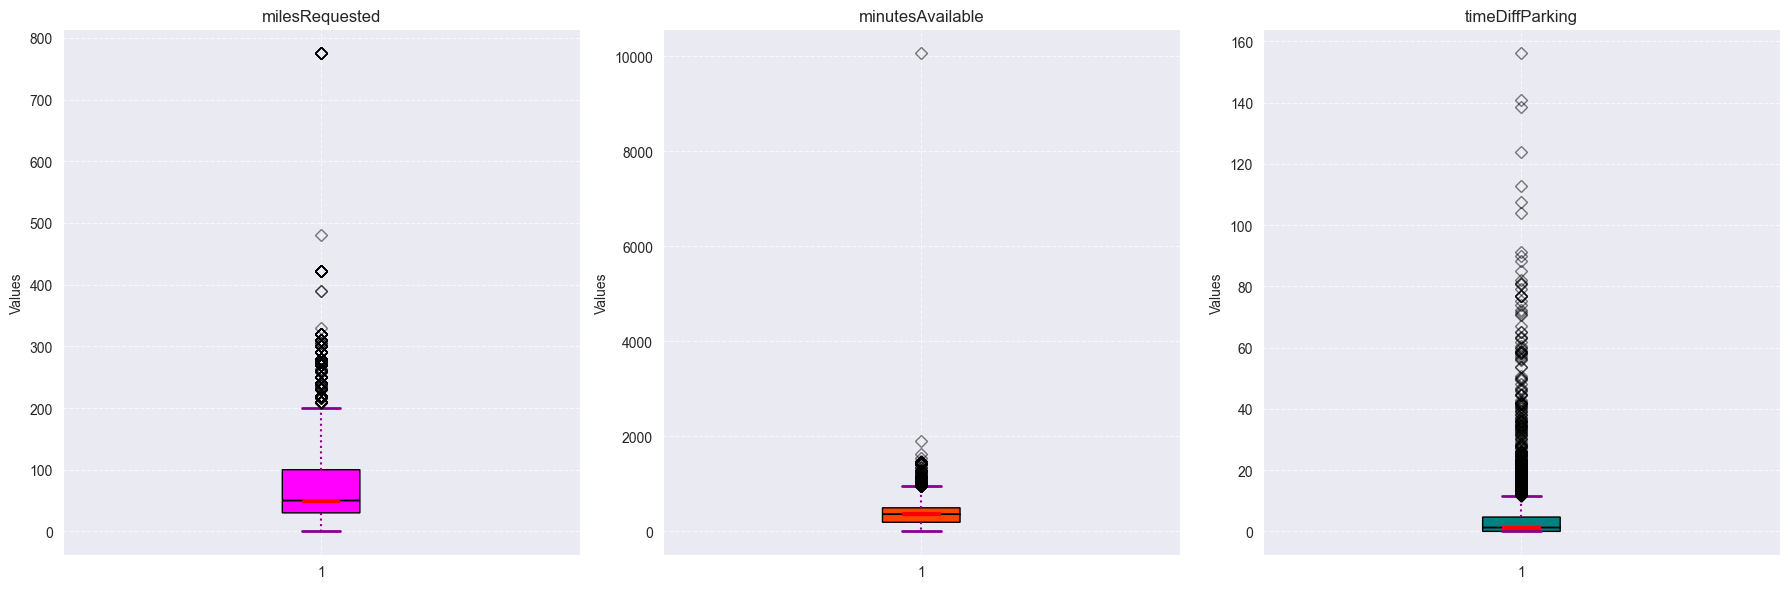

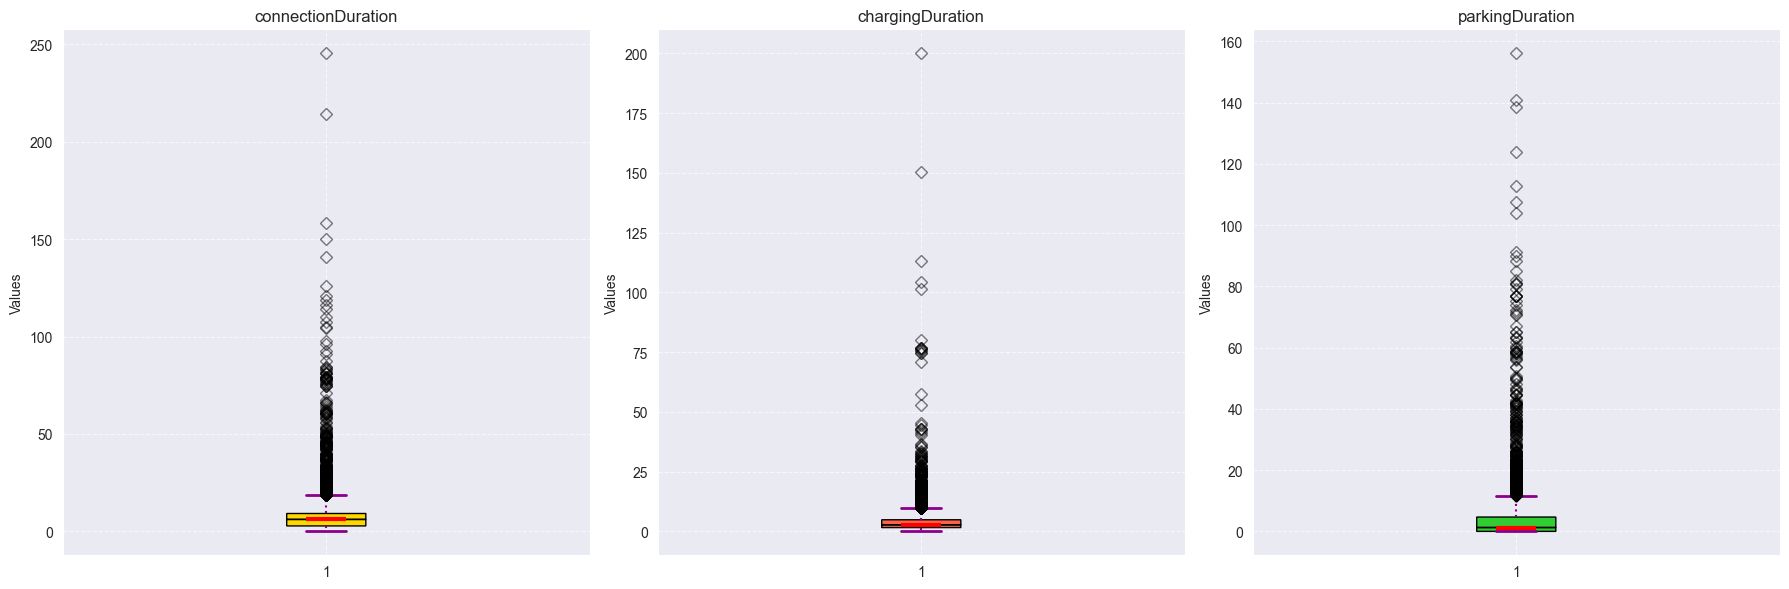

In [107]:
# Create subplots with 3 boxplots displayed side by side
for i in range(0, len(focused_features), 3):  # Process three datasets at a time
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Create 3 subplots in one row

    # Iterate over the current triplet of datasets
    for j, (ax, data_list, label, color) in enumerate(zip(axes, focused_features[i:i+3], focused_features_labels[i:i+3], colors[i:i+3])):
        # Creating boxplot
        bp = ax.boxplot(data_list, patch_artist=True, notch=True, vert=True)

        # Customizing boxplot
        for patch in bp['boxes']:
            patch.set_facecolor(color)

        for whisker in bp['whiskers']:
            whisker.set(color='#8B008B', linewidth=1.5, linestyle=":")

        for cap in bp['caps']:
            cap.set(color='#8B008B', linewidth=2)

        for median in bp['medians']:
            median.set(color='red', linewidth=3)

        for flier in bp['fliers']:
            flier.set(marker='D', color='#e7298a', alpha=0.5)

        # Adding labels and title
        ax.set_title(f"{label}")
        ax.set_ylabel('Values')
        ax.grid(True, linestyle='--', alpha=0.7)

    # Hide the remaining subplots if there are less than 3 datasets left
    for j in range(len(focused_features[i:i+3]), 3):
        axes[j].axis('off')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

In [108]:
charging_set.to_csv('data/cleaned_charging_set.csv', index=False)